In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [3]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category", "device_id": "category"}

In [2]:
dtypes_clk = { "advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "country_code": "category", 
               "latitude": np.float16, "longitude": np.float16, "wifi_connection": "category", "carrier_id": np.float16,
               "trans_id": "object", "os_major":np.float32, "brand": np.float16, "touchX": np.float16,
               "touchY": np.float16  }

In [226]:
auctions = pd.read_csv('data/auctions.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_auc)
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')
events = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory = False)
clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_clk)

### Se van a eliminar algunas columnas que no continen datos relevantes

In [227]:
auct = auctions[['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id']]
inst = installs[['created', 'application_id', 'ref_type', 'ref_hash', 'implicit', 'device_model', 'session_user_agent', 'user_agent', \
                 'wifi', 'ip_address', 'device_language']]
evnt = events.drop(['trans_id', 'device_countrycode'], axis = 'columns')
clk = clicks.drop(['action_id', 'agent_device', 'brand'], axis = 'columns')

installs -> user_agent y wifi son 1/2 null
events -> device_os_version, device_brand, device_city, user_agent, carrier, device_os, wifi y connection_type tienen muchos null

In [228]:
auct.head(1).T

,0
country,6333597102633388268
date,2019-03-11 14:18:33.290763
device_id,6059599345986491085
platform,1
ref_type_id,1
source_id,0


In [229]:
inst.head(1).T

,0
created,2019-03-13 01:43:33.445
application_id,0
ref_type,1891515180541284343
ref_hash,8464844987297247076
implicit,False
device_model,4.44525e+18
session_user_agent,NaN
user_agent,NaN
wifi,NaN
ip_address,5529284367937637301


In [230]:
evnt.head(1).T

,0
date,2019-03-05 00:09:36.966
event_id,0
ref_type,1891515180541284343
ref_hash,2688759737656491380
application_id,38
attributed,False
device_os_version,5.9087e+17
device_brand,NaN
device_model,5.99012e+18
device_city,3.25822e+18


In [231]:
clk.head(1).T

,0
advertiser_id,2
source_id,4
created,2019-03-06T22:42:12.755Z
country_code,6333597102633388268
latitude,1.20605
longitude,1.07031
wifi_connection,False
carrier_id,1
trans_id,iGgClCM9exiHF4K31g94XmvHEBSLKIY
os_minor,6.76814e+18


In [232]:
events['date'] = pd.to_datetime(events['date'])
installs['created'] = pd.to_datetime(installs['created'])
auctions['date'] = pd.to_datetime(auctions['date'])
clicks['created'] = pd.to_datetime(clicks['created'])

In [233]:
events['hour'] = events['date'].dt.hour
installs['hour'] = installs['created'].dt.hour
auctions['hour'] = auctions['date'].dt.hour
clicks['hour'] = clicks['created'].dt.hour

## 1 - Comparacion events, installs, clicks y auctions por hora

In [234]:
evnt_hora = events.groupby('hour').agg({'hour':'count'})

In [235]:
evnt_hora.columns = ['count_events']

In [236]:
inst_hora = installs.groupby('hour').agg({'hour':'count'})

In [237]:
inst_hora.columns = ['count_installs']

In [238]:
clk_hora = clicks.groupby('hour').agg({'hour':'count'})

In [239]:
clk_hora.columns = ['count_clicks']

In [240]:
auct_hora = auctions.groupby('hour').agg({'hour':'count'})

In [241]:
auct_hora.columns = ['count_auctions']

In [242]:
merged1 = evnt_hora.join(inst_hora, on = 'hour')

In [243]:
merged1 = merged1.join(clk_hora, on = 'hour')

In [244]:
merged1 = merged1.join(auct_hora, on = 'hour')

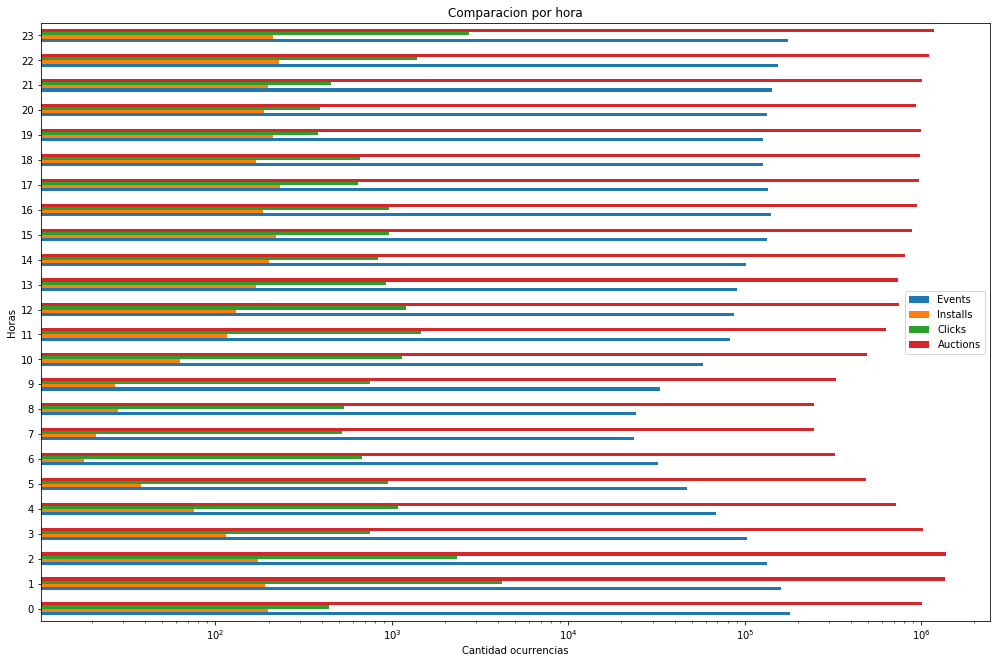

In [245]:
grph1 = merged1.plot.barh(figsize = (17,11), rot = 0, title = 'Comparacion por hora')
grph1.set_ylabel('Horas')
grph1.set_xlabel('Cantidad ocurrencias')
grph1.set_xscale('log')
grph1.legend(["Events", "Installs", "Clicks", "Auctions"]);

In [246]:
merged2 = merged1.loc[[4,5,6,7,8,9,10,11]]

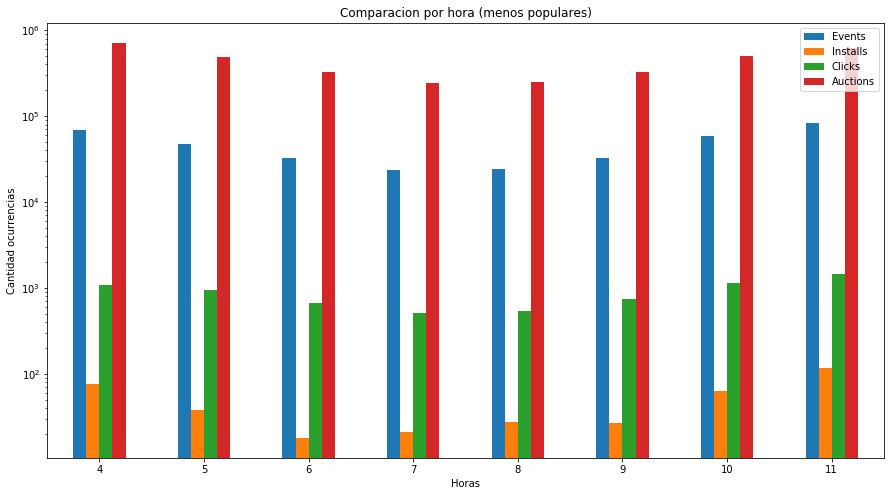

In [247]:
grph2 = merged2.plot.bar(figsize = (15,8), rot = 0, title = 'Comparacion por hora (menos populares)', style = 'o--')
grph2.set_ylabel('Cantidad ocurrencias')
grph2.set_xlabel('Horas')
grph2.set_yscale('log')
grph2.legend(["Events", "Installs", "Clicks", "Auctions"]);

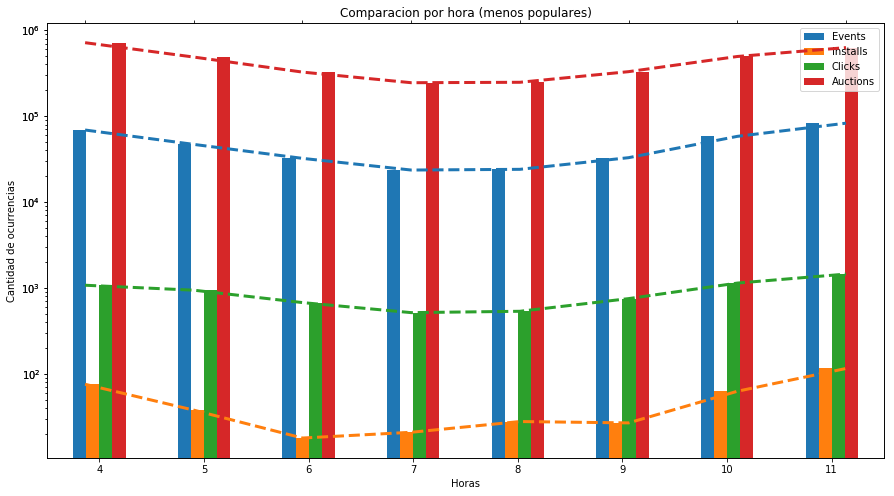

In [248]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
merged2.plot(kind='bar', ax=ax, figsize = (15,8), rot = 0, title = 'Comparacion por hora (menos populares)')
merged2.plot(kind='line',ax=ax2,linewidth = 3, style = '--', legend = False)
ax2.xaxis.get_major_formatter().set_useOffset(False)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax.set_yscale('log')
ax.set_xlabel('Horas')
ax.set_ylabel('Cantidad de ocurrencias')
ax.legend(["Events", "Installs", "Clicks", "Auctions"])
plt.show()

## 2. Relacion click-install

#### Pregunta: ¿De los usuarios que hicieron click, cuantos instalaron la aplicacion?

In [89]:
#installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')
#clicks = pd.read_csv('data/clicks.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_clk)

In [90]:
#inst = installs[['created', 'application_id', 'ref_type', 'ref_hash', 'implicit', 'device_model', 'session_user_agent', 'user_agent', \
#                 'wifi', 'ip_address', 'device_language']]
#clk = clicks.drop(['action_id', 'agent_device', 'brand'], axis = 'columns')

#Use esto para no volver a importar todo

In [91]:
clkcount = clk.groupby('ref_hash').agg({'ref_hash' : 'count'})

In [92]:
len(clkcount)

17119

In [93]:
clkcount = clkcount.rename(columns={'ref_hash':'cant_clicks'}).reset_index()

In [94]:
clkcount.sort_values('cant_clicks', ascending = False).head()

,ref_hash,cant_clicks
7487,4063522808706112974,41
12676,6841615430383729819,32
2374,1244272413279716745,26
2794,1486699123421703687,21
1687,871778630200697460,21


In [95]:
instcount = inst.groupby('ref_hash').agg({'ref_hash' : 'count'})

In [96]:
instcount = instcount.rename(columns={'ref_hash':'cant_installs'}).reset_index()

In [97]:
merged_cl_in = instcount.merge(clkcount, on = 'ref_hash', how = 'left')

In [98]:
merged_cl_in['cant_clicks'].isna().sum()

3001

In [103]:
merged_cl_in = merged_cl_in.dropna()
merged_cl_in

,ref_hash,cant_installs,cant_clicks
192,582930240149217282,1,4.0
422,1254317779988816837,1,1.0
793,2369915544093215150,1,1.0
1209,3685364020547088390,1,1.0
2355,7190737170444985036,1,1.0
2532,7759178785240189555,1,2.0
2666,8187571300120427764,1,1.0


In [104]:
len(merged_cl_in)

7

### Se ve entonces que de un numero tan elevado de clicks unicos (17119 usuarios diferentes) tan solo 7 de ellos instalaron la aplicacion que se publicita.

#### Es ademas notorio que ninguno de ellos hizo una gran cantidad de clicks en las publicidades, por lo menos en comparacion los usuarios que hicieron clicks mas veces.